In [ ]:
# Install required libraries for steganography and blockchain
!apt-get update
!apt-get install -y nodejs npm
!npm install -g ganache-cli
!pip install opencv-python scikit-image cryptography web3 py-solc-x
from solcx import compile_source, install_solc
install_solc("0.8.0")

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,605 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,700 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,244 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,848 kB]
Get:13 http://securi

<Version('0.8.0')>

Saving way.jpg to way.jpg
Secret Message to Embed: Secret Message
Metadata to Embed: Timestamp: 2025-04-24T11:27:35.382004|Author: User
Original Hash (hex): 6d44ac560062ccbf7cd062f919795740558fcf3eabea2d5957c38acae677f628
Hash Encryption Key (base64): 9bWcAjQSeB4LAro5K8XUrzvItk-3uI3WMnbdgD-jrSk=
Data Encryption Key (base64): yRdQNfiuSBczzL-W5juIRPYbd_oGl7PTd6QBCkFS8js=
Encrypted Hash (hex): 674141414141426f4369416e4c594539676650706d443966524d376964486f6f51755a6f71434376596a644c78624e36794f724336677352776b64324958572d753134344c595735424a774a353056777158473134504b77704e5952737a5243567a31384e4b2d61634564712d6a6c5f5f5a6969335161724539772d51365036585f64754a6865626c715051
Encrypted Data (hex): 674141414141426f4369416e69727649444c5a4567765964496e46453977684c705664594164777235754465634f4d4a557943694b6b5f496c373238634b5274714f744b496d6e787249327435515f494a5a306146444a5a6c3959773532394846586b4b48766f6157704c66323032624a627679624c4c344d375675747472544931744d61716e64784d4d55795f6977676e35384a45625

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Processing Stego Image:
Extracted Binary Data (first 50 bits): 01100111010000010100000101000001010000010100000101 ...
Extracted Binary Data (last 50 bits): 00011100000101010100110010011011110100110100111101 ...
Debug - Extracted Coefficients (bit index, extracted bit, coeff):
Bit 0: 0, Coeff: -50.00
Bit 1: 1, Coeff: 49.69
Bit 2: 1, Coeff: 49.88
Bit 3: 0, Coeff: -50.26
Bit 4: 0, Coeff: -49.90
Bit 100: 1, Coeff: 50.49
Bit 200: 0, Coeff: -50.12
Bit 300: 0, Coeff: -50.13
Bit 400: 0, Coeff: -50.00
Bit 500: 0, Coeff: -50.50
Bit 600: 0, Coeff: -50.12
Bit 700: 1, Coeff: 50.00
Bit 800: 0, Coeff: -49.62
Bit 900: 1, Coeff: 50.28
Bit 1000: 0, Coeff: -50.25
Bit 1100: 1, Coeff: 49.99
Bit 1200: 0, Coeff: -49.37
Bit 1300: 1, Coeff: 50.14
Bit 1400: 0, Coeff: -49.00
Bit 1467: 1, Coeff: 49.95
Bit 1468: 1, Coeff: 49.57
Bit 1469: 1, Coeff: 50.40
Bit 1470: 0, Coeff: -49.88
Bit 1471: 1, Coeff: 49.97
Extracted Encoded Data (hex): 674141414141426f4369416e69727649444c5a4567765964496e46453977684c705664594164777

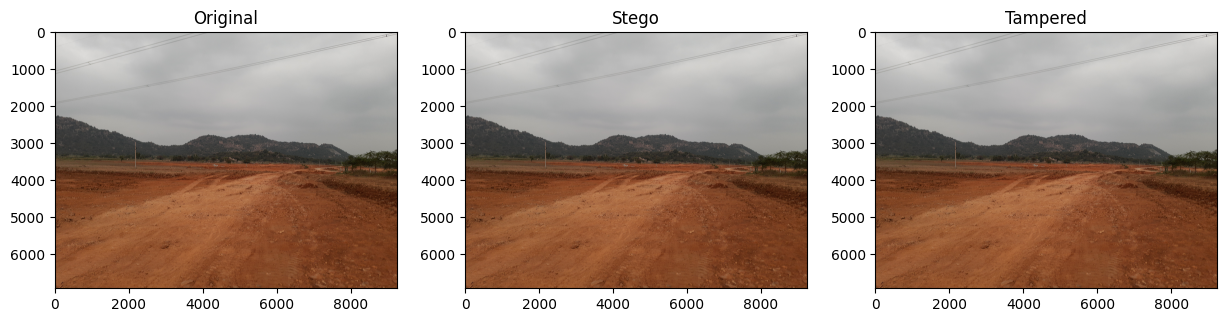

In [ ]:
import cv2
import numpy as np
from scipy.fftpack import dct, idct
import hashlib
from cryptography.fernet import Fernet
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
import base64
import datetime
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from google.colab import files
import subprocess
import time
from web3 import Web3

# Increase embedding strength for robustness
def get_embedding_strength(block):
    variance = np.var(block)
    return 100 if variance > 100 else 50

# Input data
data_input = "Secret Message"
password_hash = "mysecretpassword_hash"
password_data = "mysecretpassword_data"
author = "User"
channel_choice = "Blue"

# Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

data = data_input.encode()
print("Secret Message to Embed:", data.decode())
metadata = f"Timestamp: {datetime.datetime.now().isoformat()}|Author: {author}"
print("Metadata to Embed:", metadata)

combined_data = data + b'|' + metadata.encode()
original_hash = hashlib.sha256(combined_data).digest()
print("Original Hash (hex):", original_hash.hex())

# Generate two encryption keys
salt_hash = b'salt_hash1234'
salt_data = b'salt_data5678'
kdf_hash = PBKDF2HMAC(algorithm=hashes.SHA256(), length=32, salt=salt_hash, iterations=100000)
kdf_data = PBKDF2HMAC(algorithm=hashes.SHA256(), length=32, salt=salt_data, iterations=100000)
key_hash = base64.urlsafe_b64encode(kdf_hash.derive(password_hash.encode()))
key_data = base64.urlsafe_b64encode(kdf_data.derive(password_data.encode()))
cipher_hash = Fernet(key_hash)
cipher_data = Fernet(key_data)
encrypted_hash = cipher_hash.encrypt(original_hash)
encrypted_data = cipher_data.encrypt(combined_data)
print("Hash Encryption Key (base64):", key_hash.decode())
print("Data Encryption Key (base64):", key_data.decode())
print("Encrypted Hash (hex):", encrypted_hash.hex())
print("Encrypted Data (hex):", encrypted_data.hex())

img = cv2.imread(image_path, cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError(f"Image not found at '{image_path}'.")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape
img_float = np.float32(img)
print("Image Size:", h, "x", w, "x 3 (RGB)")

binary_data = ''.join(format(byte, '08b') for byte in encrypted_data)
print("Binary Embedded Data (first 50 bits):", binary_data[:50], "...")
print("Binary Embedded Data (last 50 bits):", binary_data[-50:], "...")
num_bits = len(binary_data)
block_size = 8
bits_per_block = 8  # Embed 8 bits per block
num_blocks_needed = (num_bits + bits_per_block - 1) // bits_per_block
print(f"Number of bits to embed: {num_bits}, Bits per block: {bits_per_block}, Number of blocks needed: {num_blocks_needed}")

# Check if image has enough capacity
total_blocks = (h // block_size) * (w // block_size)
if num_blocks_needed > total_blocks:
    raise ValueError(f"Image too small to embed {num_bits} bits. Need {num_blocks_needed} blocks, but only {total_blocks} available.")

channels = {'Red': 0, 'Green': 1, 'Blue': 2}
r, g, b = img_float[:, :, 0], img_float[:, :, 1], img_float[:, :, 2]
b_dct = np.zeros((h, w), dtype=np.float32)
b_stego = b.copy()

data_idx = 0
coeff_log = []
for i in range(0, h - block_size + 1, block_size):
    for j in range(0, w - block_size + 1, block_size):
        if data_idx < num_bits:
            block = b[i:i+block_size, j:j+block_size]
            b_dct[i:i+block_size, j:j+block_size] = dct(dct(block.T, norm='ortho').T, norm='ortho')
            strength = get_embedding_strength(block)
            for k in range(min(bits_per_block, num_bits - data_idx)):
                coeff_idx = [(4,4), (4,5), (5,4), (5,5), (3,4), (4,3), (3,5), (5,3)][k]
                coeff_before = b_dct[i+coeff_idx[0], j+coeff_idx[1]]
                coeff = coeff_before + (strength if binary_data[data_idx + k] == '1' else -strength)
                b_dct[i+coeff_idx[0], j+coeff_idx[1]] = coeff
                if (data_idx + k) < 5 or (data_idx + k) >= num_bits - 5:
                    coeff_log.append((data_idx + k, binary_data[data_idx + k], coeff_before, coeff))
            data_idx += bits_per_block
            b_stego[i:i+block_size, j:j+block_size] = idct(idct(b_dct[i:i+block_size, j:j+block_size].T, norm='ortho').T, norm='ortho')
        else:
            break
    if data_idx >= num_bits:
        break

print("Debug - Embedded Coefficients (bit index, embedded bit, before, after):")
for log_entry in coeff_log:
    print(f"Bit {log_entry[0]}: {log_entry[1]}, Before: {log_entry[2]:.2f}, After: {log_entry[3]:.2f}")

stego_img = np.stack((r, g, b_stego), axis=2)
stego_img = np.uint8(np.clip(stego_img, 0, 255))
cv2.imwrite("/content/stego_image.png", cv2.cvtColor(stego_img, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_PNG_COMPRESSION, 0])

# Create tampered stego image by inverting DCT coefficients
tampered_img = stego_img.copy()
tampered_float = np.float32(tampered_img)
r_t, g_t, b_t = tampered_float[:, :, 0], tampered_float[:, :, 1], tampered_float[:, :, 2]
b_dct_tampered = np.zeros((h, w), dtype=np.float32)
tampered_blocks = []
tamper_coeff_log = []
block_count = 0
for i in range(0, h - block_size + 1, block_size):
    for j in range(0, w - block_size + 1, block_size):
        if block_count < num_blocks_needed:
            block = b_t[i:i+block_size, j:j+block_size]
            b_dct_tampered[i:i+block_size, j:j+block_size] = dct(dct(block.T, norm='ortho').T, norm='ortho')
            for k in range(bits_per_block):
                coeff_idx = [(4,4), (4,5), (5,4), (5,5), (3,4), (4,3), (3,5), (5,3)][k]
                coeff_before = b_dct_tampered[i+coeff_idx[0], j+coeff_idx[1]]
                coeff_after = -coeff_before  # Invert to flip bit
                b_dct_tampered[i+coeff_idx[0], j+coeff_idx[1]] = coeff_after
                if block_count < 5 and k < 5:
                    tamper_coeff_log.append((block_count * bits_per_block + k, coeff_before, coeff_after))
            b_t[i:i+block_size, j:j+block_size] = idct(idct(b_dct_tampered[i:i+block_size, j:j+block_size].T, norm='ortho').T, norm='ortho')
            tampered_blocks.append((i, j))
            block_count += 1
        else:
            break
    if block_count >= num_blocks_needed:
        break
tampered_img = np.stack((r_t, g_t, b_t), axis=2)
tampered_img = np.uint8(np.clip(tampered_img, 0, 255))
cv2.imwrite("/content/tampered_stego_image.png", cv2.cvtColor(tampered_img, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_PNG_COMPRESSION, 0])
print("Tampered Blocks (row, col):", tampered_blocks[:5], "... (total:", len(tampered_blocks), ")")
print("Debug - Tampered Coefficients (bit index, before, after):")
for log_entry in tamper_coeff_log:
    print(f"Bit {log_entry[0]}: Before: {log_entry[1]:.2f}, After: {log_entry[2]:.2f}")

files.download("/content/stego_image.png")
files.download("/content/tampered_stego_image.png")

# Process stego image (original verification)
print("\nProcessing Stego Image:")
stego_img = cv2.imread("/content/stego_image.png", cv2.IMREAD_COLOR)
stego_img = cv2.cvtColor(stego_img, cv2.COLOR_BGR2RGB)
stego_float = np.float32(stego_img)
_, _, b_stego = stego_float[:, :, 0], stego_float[:, :, 1], stego_float[:, :, 2]
b_dct_stego = np.zeros((h, w), dtype=np.float32)

extracted_bits = []
data_idx = 0
extract_coeff_log = []
for i in range(0, h - block_size + 1, block_size):
    for j in range(0, w - block_size + 1, block_size):
        if data_idx < num_bits:
            block = b_stego[i:i+block_size, j:j+block_size]
            b_dct_stego[i:i+block_size, j:j+block_size] = dct(dct(block.T, norm='ortho').T, norm='ortho')
            for k in range(min(bits_per_block, num_bits - data_idx)):
                coeff_idx = [(4,4), (4,5), (5,4), (5,5), (3,4), (4,3), (3,5), (5,3)][k]
                coeff = b_dct_stego[i+coeff_idx[0], j+coeff_idx[1]]
                bit = '1' if coeff > 0 else '0'
                extracted_bits.append(bit)
                if (data_idx + k) < 5 or (data_idx + k) >= num_bits - 5 or ((data_idx + k) % 100 == 0):
                    extract_coeff_log.append((data_idx + k, bit, coeff))
            data_idx += bits_per_block
        else:
            break
    if data_idx >= num_bits:
        break

extracted_binary = ''.join(extracted_bits)
print("Extracted Binary Data (first 50 bits):", extracted_binary[:50], "...")
print("Extracted Binary Data (last 50 bits):", extracted_binary[-50:], "...")
print("Debug - Extracted Coefficients (bit index, extracted bit, coeff):")
for log_entry in extract_coeff_log:
    print(f"Bit {log_entry[0]}: {log_entry[1]}, Coeff: {log_entry[2]:.2f}")

try:
    extracted_bytes = bytes(int(extracted_binary[i:i+8], 2) for i in range(0, len(extracted_binary), 8))
except ValueError as e:
    print("Error reconstructing bytes:", e)
    extracted_bytes = b''
print("Extracted Encoded Data (hex):", extracted_bytes.hex())

try:
    decrypted_data = cipher_data.decrypt(extracted_bytes)
    decrypted_parts = decrypted_data.split(b'|', 1)
    decrypted_message = decrypted_parts[0].decode()
    decrypted_metadata = decrypted_parts[1].decode() if len(decrypted_parts) > 1 else ""
    print("Debug - Decrypted Parts:", decrypted_parts)
except Exception as e:
    print("Decryption Error:", e)
    decrypted_message = ""
    decrypted_metadata = ""
print("Extracted Secret Message:", decrypted_message)
print("Extracted Metadata:", decrypted_metadata)

recomputed_hash = hashlib.sha256(combined_data).digest()
print("Recomputed Hash (hex):", recomputed_hash.hex())
try:
    decrypted_hash = cipher_hash.decrypt(encrypted_hash)
except Exception as e:
    print("Hash Decryption Error:", e)
    decrypted_hash = b''
print("Decrypted Hash from Encrypted Hash (hex):", decrypted_hash.hex())
print("Hash Verification:", decrypted_hash == recomputed_hash)
if decrypted_hash != recomputed_hash:
    print(f"Hash Mismatch - Original: {recomputed_hash.hex()}, Decrypted: {decrypted_hash.hex()}")

psnr_value = psnr(img, stego_img, data_range=255)
ssim_value = ssim(img, stego_img, win_size=7, channel_axis=2, data_range=255)
print("PSNR (dB):", psnr_value)
print("SSIM:", ssim_value)

# Process tampered image
print("\nProcessing Tampered Stego Image:")
tampered_img = cv2.imread("/content/tampered_stego_image.png", cv2.IMREAD_COLOR)
tampered_img = cv2.cvtColor(tampered_img, cv2.COLOR_BGR2RGB)
tampered_float = np.float32(tampered_img)
_, _, b_tampered = tampered_float[:, :, 0], tampered_float[:, :, 1], tampered_float[:, :, 2]
b_dct_tampered = np.zeros((h, w), dtype=np.float32)

extracted_bits_tampered = []
data_idx = 0
extract_coeff_log_tampered = []
for i in range(0, h - block_size + 1, block_size):
    for j in range(0, w - block_size + 1, block_size):
        if data_idx < num_bits:
            block = b_tampered[i:i+block_size, j:j+block_size]
            b_dct_tampered[i:i+block_size, j:j+block_size] = dct(dct(block.T, norm='ortho').T, norm='ortho')
            for k in range(min(bits_per_block, num_bits - data_idx)):
                coeff_idx = [(4,4), (4,5), (5,4), (5,5), (3,4), (4,3), (3,5), (5,3)][k]
                coeff = b_dct_tampered[i+coeff_idx[0], j+coeff_idx[1]]
                bit = '1' if coeff > 0 else '0'
                extracted_bits_tampered.append(bit)
                if (data_idx + k) < 5 or (data_idx + k) >= num_bits - 5 or ((data_idx + k) % 100 == 0):
                    extract_coeff_log_tampered.append((data_idx + k, bit, coeff))
            data_idx += bits_per_block
        else:
            break
    if data_idx >= num_bits:
        break

extracted_binary_tampered = ''.join(extracted_bits_tampered)
print("Tampered Extracted Binary Data (first 50 bits):", extracted_binary_tampered[:50], "...")
print("Tampered Extracted Binary Data (last 50 bits):", extracted_binary_tampered[-50:], "...")
print("Debug - Tampered Extracted Coefficients (bit index, extracted bit, coeff):")
for log_entry in extract_coeff_log_tampered:
    print(f"Bit {log_entry[0]}: {log_entry[1]}, Coeff: {log_entry[2]:.2f}")

# Count and detail bit errors
bit_errors = sum(1 for a, b in zip(extracted_binary, extracted_binary_tampered) if a != b)
print(f"Number of Bit Errors (stego vs. tampered): {bit_errors}/{num_bits}")
bit_error_positions = [i for i, (a, b) in enumerate(zip(extracted_binary, extracted_binary_tampered)) if a != b]
print("Bit Error Positions (first 10):", bit_error_positions[:10], "..." if len(bit_error_positions) > 10 else "")

try:
    extracted_bytes_tampered = bytes(int(extracted_binary_tampered[i:i+8], 2) for i in range(0, len(extracted_binary_tampered), 8))
except ValueError as e:
    print("Error reconstructing bytes (tampered):", e)
    extracted_bytes_tampered = b''
print("Tampered Extracted Encoded Data (hex):", extracted_bytes_tampered.hex())

# Show corrupted data
if extracted_bytes_tampered:
    print("Tampered Raw Extracted Bytes (hex):", extracted_bytes_tampered.hex())
    try:
        corrupted_text = extracted_bytes_tampered.decode('utf-8', errors='replace')
        print("Tampered Raw Extracted Bytes as Text (possibly garbled):", corrupted_text)
    except Exception as e:
        print("Cannot decode tampered bytes as text:", e)

try:
    decrypted_data_tampered = cipher_data.decrypt(extracted_bytes_tampered)
    decrypted_parts_tampered = decrypted_data_tampered.split(b'|', 1)
    decrypted_message_tampered = decrypted_parts_tampered[0].decode()
    decrypted_metadata_tampered = decrypted_parts_tampered[1].decode() if len(decrypted_parts_tampered) > 1 else ""
    print("Debug - Tampered Decrypted Parts:", decrypted_parts_tampered)
except Exception as e:
    print("Decryption Error (tampered):", str(e))
    decrypted_message_tampered = ""
    decrypted_metadata_tampered = ""
    # Attempt partial decryption or data extraction
    try:
        corrupted_data = extracted_bytes_tampered[:len(encrypted_data)]
        corrupted_text = corrupted_data.decode('utf-8', errors='replace')
        parts = corrupted_text.split('|', 1)
        decrypted_message_tampered = parts[0]
        decrypted_metadata_tampered = parts[1] if len(parts) > 1 else ""
        print("Partial Corrupted Message:", decrypted_message_tampered)
        print("Partial Corrupted Metadata:", decrypted_metadata_tampered)
    except Exception as e:
        print("Cannot extract partial corrupted data:", e)

print("Tampered Extracted Secret Message:", decrypted_message_tampered)
print("Tampered Extracted Metadata:", decrypted_metadata_tampered)

# Show differences if decryption succeeds but data differs
if decrypted_message_tampered and decrypted_message_tampered != data_input:
    print(f"Message Mismatch - Original: {data_input}, Tampered: {decrypted_message_tampered}")
if decrypted_metadata_tampered and decrypted_metadata_tampered != metadata:
    print(f"Metadata Mismatch - Original: {metadata}, Tampered: {decrypted_metadata_tampered}")

recomputed_hash_tampered = hashlib.sha256(combined_data).digest()
print("Recomputed Hash (tampered, hex):", recomputed_hash_tampered.hex())
print("Hash Verification (tampered):", decrypted_hash == recomputed_hash_tampered)
if decrypted_hash != recomputed_hash_tampered:
    print(f"Hash Mismatch (tampered) - Original: {recomputed_hash_tampered.hex()}, Decrypted: {decrypted_hash.hex()}")

# Blockchain Integration
ganache_process = None
try:
    ganache_process = subprocess.Popen(
        ["ganache-cli", "--port", "8545", "--accounts", "10", "--defaultBalanceEther", "100"],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE
    )
    time.sleep(10)
except Exception as e:
    print(f"Error starting Ganache: {e}")
    print("Skipping blockchain integration, proceeding with tampering detection...")

# Initialize Web3 only if Ganache started successfully
hash_storage = None
if ganache_process:
    w3 = Web3(Web3.HTTPProvider("https://9581-103-199-188-225.ngrok-free.app"))
    if not w3.is_connected():
        print("Failed to connect to Ganache")
        ganache_process.terminate()
    else:
        print("Connected to Ganache")
        account = w3.eth.accounts[0]
        print(f"Using account: {account}")

        contract_source_code = """
        // SPDX-License-Identifier: MIT
        pragma solidity ^0.8.0;

        contract HashStorage {
            struct HashRecord {
                bytes32 hash;
                string metadata;
                uint256 timestamp;
            }
            mapping(address => HashRecord[]) public hashes;
            event HashStored(address indexed user, bytes32 hash, string metadata, uint256 timestamp);

            function storeHash(bytes32 _hash, string memory _metadata) public {
                HashRecord memory record = HashRecord(_hash, _metadata, block.timestamp);
                hashes[msg.sender].push(record);
                emit HashStored(msg.sender, _hash, _metadata, block.timestamp);
            }

            function getHash(address _user, uint256 index) public view returns (bytes32, string memory, uint256) {
                require(index < hashes[_user].length, "Index out of bounds");
                HashRecord memory record = hashes[_user][index];
                return (record.hash, record.metadata, record.timestamp);
            }

            function getHashCount(address _user) public view returns (uint256) {
                return hashes[_user].length;
            }

            function verifyHash(bytes32 _hash, address _user, uint256 index) public view returns (bool) {
                require(index < hashes[_user].length, "Index out of bounds");
                return hashes[_user][index].hash == _hash;
            }
        }
        """

        try:
            with open("HashStorage.sol", "w") as f:
                f.write(contract_source_code)
            compiled_sol = compile_source(contract_source_code, output_values=['abi', 'bin'])
            contract_interface = compiled_sol['<stdin>:HashStorage']
        except Exception as e:
            print(f"Error compiling contract: {e}")
            if ganache_process:
                ganache_process.terminate()
            ganache_process = None

        if ganache_process:
            try:
                w3.eth.default_account = account
                contract = w3.eth.contract(abi=contract_interface['abi'], bytecode=contract_interface['bin'])
                tx_hash = contract.constructor().transact()
                tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)
                contract_address = tx_receipt.contractAddress
                print(f"Contract deployed at: {contract_address}")
            except Exception as e:
                print(f"Error deploying contract: {e}")
                ganache_process.terminate()
                ganache_process = None

        if ganache_process:
            hash_storage = w3.eth.contract(address=contract_address, abi=contract_interface['abi'])
            hash_to_store = encrypted_hash[:32]  # Truncate to 32 bytes for bytes32
            try:
                tx_hash = hash_storage.functions.storeHash(hash_to_store, metadata).transact()
                w3.eth.wait_for_transaction_receipt(tx_hash)
                print(f"Hash stored on blockchain: {hash_to_store.hex()} with metadata: {metadata}")
            except Exception as e:
                print(f"Error storing hash: {e}")
                ganache_process.terminate()
                ganache_process = None

            if ganache_process:
                try:
                    hash_count = hash_storage.functions.getHashCount(account).call()
                    print(f"Total hashes stored for account: {hash_count}")
                    if hash_count > 0:
                        stored_hash, stored_metadata, stored_timestamp = hash_storage.functions.getHash(account, hash_count - 1).call()
                        print(f"Retrieved from blockchain: Hash: {stored_hash.hex()}, Metadata: {stored_metadata}, Timestamp: {stored_timestamp}")
                        is_verified = hash_storage.functions.verifyHash(hash_to_store, account, hash_count - 1).call()
                        print("Blockchain Hash Verification:", is_verified)
                except Exception as e:
                    print(f"Error retrieving/verifying hash: {e}")
                    ganache_process.terminate()
                    ganache_process = None

# Tampering detection for stego image
print("\nTampering Detection (Stego Image):")
try:
    is_data_tampered = decrypted_message != data_input or decrypted_metadata != metadata
    if is_data_tampered:
        print("Warning: Steganography verification failed. Image may be tampered.")
    else:
        print("Steganography verification passed.")
        if hash_storage:
            blockchain_verified = hash_storage.functions.verifyHash(hash_to_store, account, hash_count - 1).call()
            print(f"Blockchain Tampering Check: {'No tampering detected' if blockchain_verified else 'Tampering detected'}")
        else:
            print("Blockchain verification skipped due to Ganache failure.")
except Exception as e:
    print(f"Error in tampering detection: {e}")

# Tampering detection for tampered image
print("\nTampering Detection (Tampered Image):")
try:
    is_data_tampered = decrypted_message_tampered != data_input or decrypted_metadata_tampered != metadata
    if is_data_tampered:
        print("Warning: Steganography verification failed. Image may be tampered.")
    else:
        print("Steganography verification passed.")
        if hash_storage:
            blockchain_verified = hash_storage.functions.verifyHash(hash_to_store, account, hash_count - 1).call()
            print(f"Blockchain Tampering Check: {'No tampering detected' if blockchain_verified else 'Tampering detected'}")
        else:
            print("Blockchain verification skipped due to Ganache failure.")
except Exception as e:
    print(f"Error in tampering detection (tampered): {e}")

# Visualize original, stego, and tampered images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(img), plt.title("Original")
plt.subplot(1, 3, 2), plt.imshow(stego_img), plt.title("Stego")
plt.subplot(1, 3, 3), plt.imshow(tampered_img), plt.title("Tampered")
plt.show()

if ganache_process:
    ganache_process.terminate()